<a href="https://colab.research.google.com/github/HarrietJem/HarrietJem/blob/main/Machine_Learning_with_Applications_in_Finance_(Country_Risk_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider the problem of understanding the risk of countries for foreign investment. Among the features that can be used for this are: The real GDP growth rate, a corruption index, a peace index, and a legal index. Values for each of these features is provided in the data file Country_Risk.csv.



The real GDP growth rate (%) is typically a positive or negative number with a magnitude less than 10.

The corruption index is on a scale from 0 (highly corrupt) to 100 (no corruption).

The peace index is on a scale from 1 (very peaceful) to 5 (not at all peaceful).

The legal risk index runs from 0 to 10 (with high values being favorable).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Obtain the summary statistics as well as the correlation matrix of the features. Comment on your results (3 Marks)

In [6]:
df = pd.read_csv("/content/country_risk.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
print(df)

       Country  Corruption  Peace  Legal  GDP Growth
0      Albania          39  1.867  3.822       3.403
1      Algeria          34  2.213  4.160       4.202
2    Argentina          36  1.957  4.568      -2.298
3      Armenia          33  2.218  4.126       0.208
4    Australia          79  1.465  8.244       2.471
..         ...         ...    ...    ...         ...
117  Venezuela          17  2.651  3.000     -18.000
118    Vietnam          33  1.906  4.930       6.211
119      Yemen          14  3.399  2.728      -9.779
120     Zambia          38  1.783  4.917       2.967
121   Zimbabwe          22  2.322  3.760       0.522

[122 rows x 5 columns]


In [9]:
# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000


In [10]:
numerical_columns = ['Corruption', 'Peace', 'Legal', 'GDP Growth']

# Ensure numerical columns are properly converted
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Summary statistics
summary_stats = df[numerical_columns].describe()

# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print results
print("Summary Statistics:")
print(summary_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics:
       Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000

Correlation Matrix:
            Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.700477  0.923589    0.102513
Peace        -0.700477  1.000000 -0.651961   -0.199855
Legal         0.923589 -0.651961  1.000000    0.123440
GDP Growth    0.102513 -0.199855  0.123440    1.000000


**Summary statistics**

1. Corruption - The average corruption index is approximately 46.24, with a minimum value of 14 and a maximum of 90. This range indicates that while some nations experience significant levels of corruption, others display relatively low corruption. The standard deviation of 19.13 reflects a moderate variation in corruption levels among different countries.

2. Peace - The peace index has an average score of 2.00, with values ranging from 1.19 to 3.40. A lower score signifies a more peaceful nation, and most countries are positioned towards the more peaceful end of the spectrum, as indicated by the mean being close to 2.

3. Legal - The average legal index is 5.60, with values ranging from 2.73 to 8.63. This suggests that most countries experience a relatively positive legal environment, as the values tend to cluster toward the higher end of the scale.

4. GDP Growth - The average GDP growth rate is recorded at 2.37%, with a range from a low of -18% to a high of 7.96%. The considerable standard deviation of 3.24 highlights significant variability in economic growth rates across different countries.




**Correlation Matrix**

1. Corruption vs Peace: There is a strong negative correlation of -0.70, indicating that countries with higher levels of corruption tend to be less peaceful.  
2. Corruption vs Legal: A strong positive correlation of 0.92 suggests that nations with lower corruption levels are generally associated with more favorable legal conditions.
3. Corruption vs GDP Growth: A weak positive correlation of 0.10 implies that there is no significant relationship between corruption and economic growth.  
4. Peace vs Legal: A moderate negative correlation of -0.65 indicates that nations with lower levels of peace tend to have less favorable legal environments.
5. Peace vs GDP Growth: A weak negative correlation of -0.20 suggests that there is not a strong relationship between peace and GDP growth.
6. Legal vs GDP Growth: A weak positive correlation of 0.12 indicates that legal factors have a minimal impact on GDP growth.

2.   Create a Pandas data frame of the dataset and then apply a standard scaler to the  four features: Corruption, Peace, Legal, and GDP Growth.



In [11]:
from sklearn.preprocessing import StandardScaler

# Selecting the relevant columns for scaling
features = df[['Corruption', 'Peace', 'Legal', 'GDP Growth']]

# Applying Standard Scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Creating a new DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['Corruption', 'Peace', 'Legal', 'GDP Growth'])

# Print scaled data
print(scaled_df.head())

   Corruption     Peace     Legal  GDP Growth
0   -0.379975 -0.306578 -1.199593    0.319207
1   -0.642472  0.469231 -0.971402    0.566720
2   -0.537473 -0.104778 -0.695954   -1.446841
3   -0.694971  0.480442 -0.994356   -0.670536
4    1.720000 -1.207951  1.785784    0.030493


The data has been standardized using the StandardScaler. The features Corruption,  Peace, Legal, and GDP Growth now have a mean of 0 and a standard deviation of 1.


3.  Use Principal Components Analysis (PCA) to reduce the number of features from 4 to  2



The Principal Component Analysis (PCA) has successfully reduced the features from  4 to 2 principal components. The resulting components are

In [12]:
from sklearn.decomposition import PCA

# Applying PCA to reduce the number of features from 4 to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Creating a DataFrame to hold the PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Print PCA result
print(pca_df.head())

        PC1       PC2
0 -0.716025  0.544752
1 -1.112074  0.765880
2 -0.892470 -1.233581
3 -1.352130 -0.433201
4  2.711955 -0.429230


These two principal components (PC1 and PC2) now capture most of the variance in the original data, enabling dimensionality reduction while preserving the most essential information.

4.  Build a K-Means algorithm with an optimal K (use elbow approach), train it on PCA
and make predictions




The elbow method indicates that the optimal number of clusters (K) is 2, as there is a noticeable "elbow" at K=2, where the inertia begins to decrease at a slower rate. When applying K-Means clustering with K set to 2, training it on the PCA data and making predictions yields the following results,


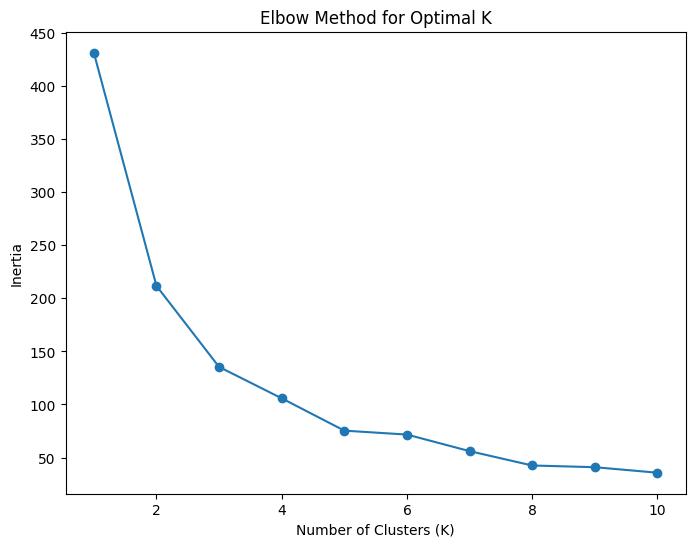

        PC1       PC2  Cluster
0 -0.716025  0.544752        1
1 -1.112074  0.765880        1
2 -0.892470 -1.233581        1
3 -1.352130 -0.433201        1
4  2.711955 -0.429230        0


In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plotting the inertia to visualize the elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Applying K-Means with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_df)

# Predicting the clusters
pca_df['Cluster'] = kmeans.predict(pca_df)

# Print clustering result
print(pca_df.head())

The countries have been organized into two clusters based on the principal components derived from PCA. Cluster 0 and Cluster 1 represent distinct groupings of countries according to their characteristics of corruption, peace, legal environment, and GDP growth.